In [1]:
"""
Code for QOSF Task 1
1. Statevector Simulation of quantum circuits
2. Advanced simulation using tensor multiplication
3. Bonus question
"""

'\nCode for QOSF Task 1\n1. Statevector Simulation of quantum circuits\n2. Advanced simulation using tensor multiplication\n3. Bonus question\n'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

In [3]:
###Give number of qubits get a circuit with gates comprised
### of X,H and CNOT gates
def get_circuit(n_qubits):
    """
    Input : number of qubits
    Output : List of (gate,gate_name)

    Creates a random circuit given number of qubits
    """
    n=n_qubits
    gdim=[] #for tracking the number of qubits in the added gate
    Mat=[]  #list containing the gate matrices and names
    ###While the number of qubits are not exhausted keep adding a random gate to circuit
    while(n>0):
        if n>=2:
            num=np.random.choice([1,2],size=1)[0]
        else:
            num=1
        gdim.append(num)
        n-=num
            
    ### This part can be extended for other gates
    for d in gdim:
        if d==1:
            gate_name=np.random.choice(['X','H'],size=1)[0]
        else:
            gate_name='CNOT'
        Mat.append((Gates[gate_name],gate_name))
    return Mat

In [4]:
###Given gates, get the transformation matrix
def get_matrix(gates):
    """
    Input : List of (gate,gate_name)
    Output : Kronecker product of gate matrices
    """
    M=gates[0][0]
    for mat,_ in gates[1:]:
        M=np.kron(M,mat)
    return M


In [5]:
###Get the statevector given, number of qubits, here the first
### vector is chosen |0> and other vectors are randomly chosen 
### between |0> and |1> This can be made more general if needed

def get_statevector(n_qubits):
    """
    Inputs : number of qubits (int)
    Output : statevector (np.array)
    """
    vec_list=[]
    state_vector=np.array([1,0])
    for i in range(n_qubits-1):
        index=np.random.choice([0,1],size=1)[0]
        if index==0:
            state_vector=np.kron(state_vector,np.array([1,0]))  ###Add |0>
        else:
            state_vector=np.kron(state_vector,np.array([0,1]))  ###Ad |1>
    
    return state_vector


In [6]:
###This function converts the statevector to tensor representation such that
### tensordot can be computed. The form of the tensor is (2,2,..4, 2...)
### The dimension of axis is 2**(no.qubits) for the corresponding gate
def get_statetensor(gates,statevector):
    """
    Input: List of (gate,gate_name), statevector : np.array
    Output : state_tensor (np.array)
    """
    shape=statevector.shape[0]
    new_dim=[]
    for i, (mat,_) in enumerate(gates):
        ###For two qubit gates . Eg. CNOT
        if mat.shape[0]==4:
            new_dim.append(4)
            shape=shape//4
        ###For single qubit gate
        else:
            new_dim.append(2)
            shape=shape//2   
    state_tensor=np.reshape(statevector,new_dim)    
    return state_tensor


In [7]:
def calculate_tensordot(gates,statetensor):
    """
    Input :     Input: List of (gate,gate_name), statetensor : np.ndarray
    Output : statetensor obtained after 
    """
    for i,(mat,_) in enumerate(gates):
        statetensor = np.moveaxis(statetensor, i, 0)
        statetensor=np.tensordot(mat, statetensor, axes=([1], [0]))
        statetensor = np.moveaxis(statetensor, 0, i)
    return statetensor

In [18]:
if __name__=="__main__": 
    ###Dictionary storing gate names as keys and corrsesponding gate matrices as arrays
    Gates={}
    Gates['X']=np.array([[0, 1], [1, 0]])
    Gates['H'] = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])
    Gates['I']=np.eye(2)
    Gates['CNOT'] = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

In [22]:
    ####Print an example
    n_qubits=5 
    gates=get_circuit(n_qubits)
    M=get_matrix(gates)
    v=get_statevector(n_qubits)
    statevector=np.dot(M,v)
    print(M.shape,v.shape)
    print(f"State vector obtained is {statevector}")


(32, 32) (32,)
State vector obtained is [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.70710678 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.70710678]


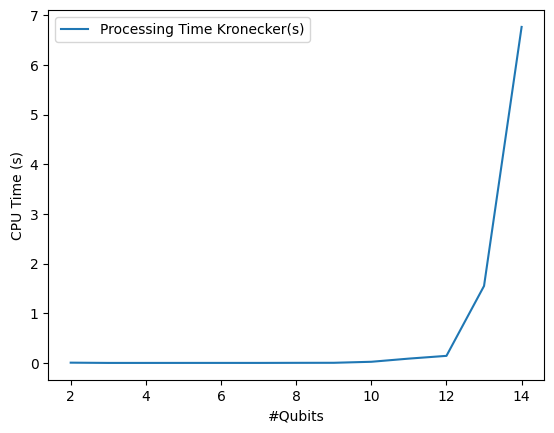

In [27]:
    ########## Plot execution time ###########################
    processing_times=[]
    nqubit_list=[]
    max_qubits=15
    for n_qubits in range(2,max_qubits):
        start_time=time.time()
        ###Define and get a circuit with CNOT, X and H gates
        gates=get_circuit(n_qubits)
        
        ###Kronecker product of gate matrices    
        M=get_matrix(gates)
        v=get_statevector(n_qubits)
        statevector=M@v
        end_time=time.time()
        cpu_time=end_time-start_time
        processing_times.append(cpu_time)
        nqubit_list.append(n_qubits)
    plt.plot(nqubit_list,processing_times,label='Processing Time Kronecker(s)')
    plt.xlabel('#Qubits')
    plt.ylabel('CPU Time (s)')
    plt.legend()
    plt.savefig("cpu_time.png")
    plt.show()
    
    # statetensor=get_statetensor(gates,v)
    # new_statetensor=calculate_tensordot(gates,statetensor)

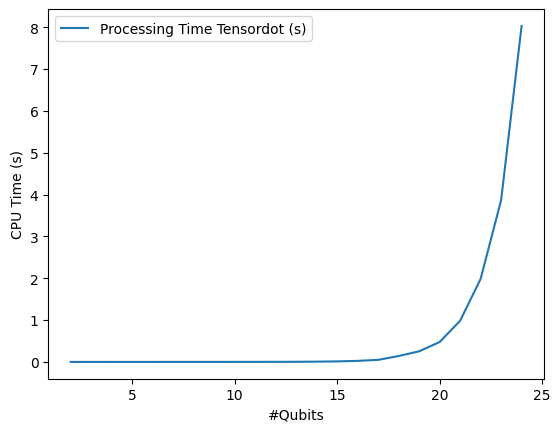

In [24]:
    #######Plot execution time###############################
    processing_times=[]
    nqubit_list=[]
    max_qubits=25
    for n_qubits in range(2,max_qubits):
        start_time=time.time()

        gates=get_circuit(n_qubits)
        v=get_statevector(n_qubits)
        statetensor=get_statetensor(gates,v)

        ###New method for speeding up simulation, where kronecker is replaced by sequential application of gates
        new_statetensor=calculate_tensordot(gates,statetensor)

        end_time=time.time()
        cpu_time=end_time-start_time
        processing_times.append(cpu_time)
        nqubit_list.append(n_qubits)
    plt.plot(nqubit_list,processing_times,label='Processing Time Tensordot (s)')
    plt.xlabel('#Qubits')
    plt.ylabel('CPU Time (s)')
    plt.legend()
    plt.savefig("cpu_time_tensordot.png")
    plt.show()



In [25]:
    ###########Sampling from final states in the statevector representation ####
    ###Declare the number of qubits and number of samples to be simulated
    n_qubits=5 
    num_samples=10

    ###Get a circuit to be simulated with specified number of qubits
    gates=get_circuit(n_qubits)
    v=get_statevector(n_qubits)
    statetensor=get_statetensor(gates,v)
    
    ####Apply the gates to the statevector
    new_statetensor=calculate_tensordot(gates,statetensor)
    new_statetensor=new_statetensor.flatten()
    
    ###Compute magnitude of statevector to get probability amplitudes
    probabilities_un_normalized=new_statetensor.conj().T*new_statetensor
    ###Normalize
    probabilities_normalized=probabilities_un_normalized/np.sum(probabilities_un_normalized)
    
    ###Sample from the distrubution
    samples = np.random.choice(2**n_qubits, size=num_samples, p=probabilities_normalized)
    
    ###Represent sampled outcome in binary. If number of bits are changed to more than 5 please change the output format
    binary_outcome =[ format(outcome, '05b') for outcome in samples]
    print(f"Measured states: {binary_outcome}")

(32,)
Measured states: ['11000', '11000', '11000', '11000', '11000', '11000', '11000', '11000', '11000', '11000']


In [26]:
    ########## Computing exact expectation ##########
    ###Compute the operator using X gates 
    Ops=[]
    for i in range(n_qubits):
        op_list=[]
        for j in range(n_qubits):
            if (i==j):
                op_list.append((Gates['X'],'X'))
            else:
                op_list.append((Gates['I'],'I'))
        Ops.append(op_list)
    
    Op_tensor=np.zeros((2**n_qubits,2**n_qubits))
    for Op in Ops:
        Op_tensor+=get_matrix(Op)

    ###Compute the expectation
    operator=Op_tensor
    expectation_value_tensor = np.conj(new_statetensor).T @ operator @ new_statetensor
    print(f"Expectation value of <psi| operator | psi>: {expectation_value_tensor}")


Expectation value of <psi| operator | psi>: 0.0
